In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly_express as px

In [2]:
# Lösning veckor: Matplotlib och x ticks samt rotering/läge så de får plats osv. 
# Behöver trixa lite i matplotlib för att få till det snyggt. 
# Se senast föreläsning om hur man synkar två olika tabeller osv



# Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för
# att läsa in bladet: "Veckodata Riket" i covid19-filen.

veckodata_riket = pd.read_excel("visualiseringar\\covid-19.xlsx", sheet_name="Veckodata Riket")  

#a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(),
# describe(), value_counts(), head(), columns, index för att snabbt få en överblick.


# veckodata_riket.info()
# veckodata_riket.describe()
# veckodata_riket.value_counts()
# veckodata_riket.head()
veckodata_riket.columns


Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [3]:
#b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:
# "Vecka": "2020v6"ArithmeticError

new_column_values = veckodata_riket["år"].apply(str) + "v" + veckodata_riket["veckonummer"].apply(str)    # Apply här för att varje värde ska omvandlas till str
veckodata_riket.insert(2, "Vecka", new_column_values)
# veckodata_riket.drop("Vecka", axis=1, inplace= True)

In [4]:
veckodata_riket.head()

,år,veckonummer,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


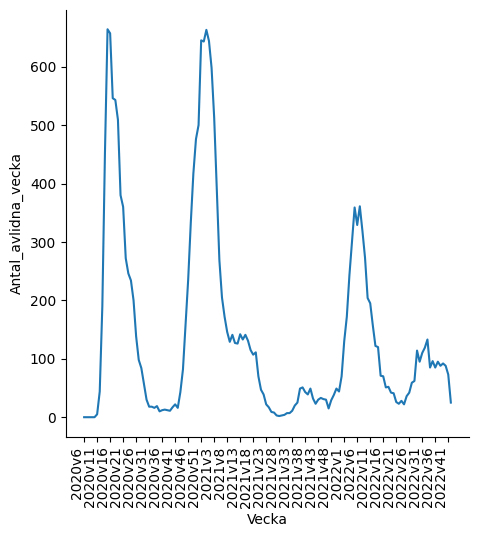

In [5]:
#c) 
line_plot = sns.relplot(x='Vecka', y='Antal_avlidna_vecka', data=veckodata_riket, kind = "line")

# Set the x-axis ticks at specific intervals (e.g., every 5th tick)
tick_indexes = np.arange(0, len(veckodata_riket['Vecka']), 5)         # create index of ranges each 5 positions
plt.xticks(tick_indexes, veckodata_riket['Vecka'].iloc[tick_indexes], rotation=90, ha="right")
plt.show()



In [6]:
fig = px.line(veckodata_riket, x='Vecka', y='Antal_avlidna_vecka', title='Avlidna per vecka')
fig.update_layout(height=400, width=600)
fig.show()

In [7]:
veckodata_riket.head(1)

,år,veckonummer,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0


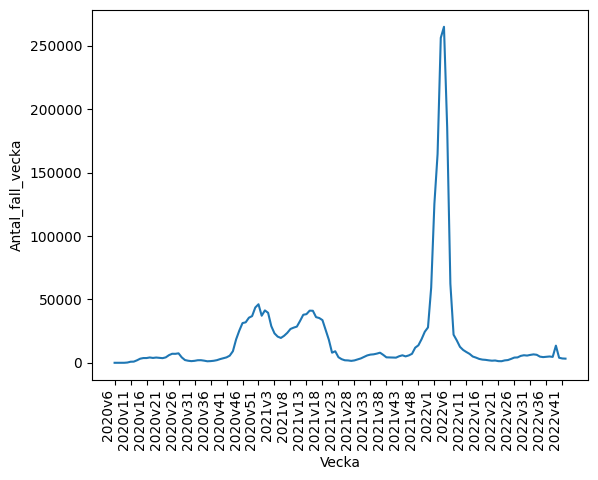

In [8]:
#d) 
line_plot = sns.lineplot(x='Vecka', y='Antal_fall_vecka', data=veckodata_riket)

tick_indexes = np.arange(0, len(veckodata_riket['Vecka']), 5)         # create index of ranges each 5 positions
plt.xticks(tick_indexes, veckodata_riket['Vecka'].iloc[tick_indexes], rotation=90, ha="right")

plt.show()

In [9]:
fig = px.line(veckodata_riket, x='Vecka', y='Antal_fall_vecka', title='Fall per vecka')

fig.update_layout(height=400, width=600)

fig.show()


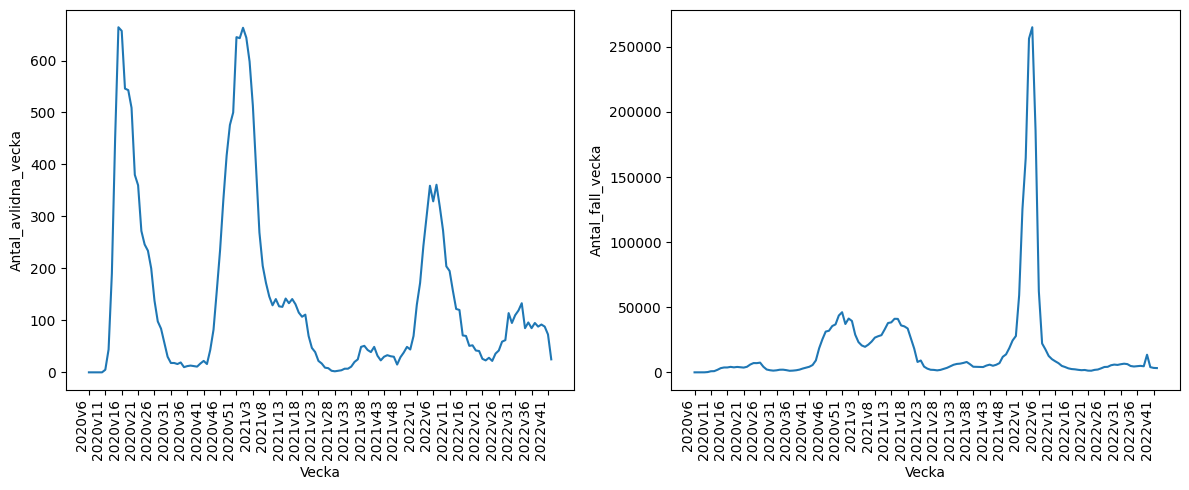

In [10]:
#e)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

line_plot = sns.lineplot(x='Vecka', y='Antal_avlidna_vecka', data=veckodata_riket, ax=axes[0])
line_plot2 = sns.lineplot(x='Vecka', y='Antal_fall_vecka', data=veckodata_riket, ax=axes[1])



tick_indices = np.arange(0, len(veckodata_riket['Vecka']), 5)
tick_labels = veckodata_riket['Vecka'].iloc[tick_indices]

axes[0].set_xticks(tick_indices)
axes[0].set_xticklabels(tick_labels, rotation=90, ha="right")


axes[1].set_xticks(tick_indices)
axes[1].set_xticklabels(tick_labels, rotation=90, ha="right")


plt.tight_layout()


plt.show()

In [11]:
#f)

fig = px.line(veckodata_riket, x='Vecka', y='Kum_antal_avlidna', title='Avlidna per vecka')

fig.update_layout(height=400, width=600)

fig.show()


